<a href="https://colab.research.google.com/github/divyajmk/assignment4/blob/main/Final_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [200]:
! git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [201]:
import numpy as np
import pandas as pd
from scipy import stats

# Part 1 - Load Data and Clean
df = pd.read_csv('./assignment4/data/cars_hw.csv')
df.head()
print(df.columns.tolist())

['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


In [202]:
# Summarizing 'Price' BEFORE any cleaning

# I commented out the .unique statements in each code block, since
# those took up a lot of space, but I used the .unique statements
# to help me know what type of transformations to do or
# if I needed to factor out the outliers

# print(df['Price'].unique())
print(df['Price'].describe())

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


In [203]:
# To handle the outliers for 'Price', the rows where 'Price' was more than
# three standard deviations away from the mean was filtered out.
# Being more than three standard deviations away from the mean means there are
# most likely outliers.
# I used this website to help me determine that: https://www.investopedia.com/terms/e/empirical-rule.asp
# I used this website to help me find the zscore: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
df = df[(np.abs(stats.zscore(df['Price'])) < 3)]
# print(df['Price'].unique())
print(df['Price'].describe())

count    9.510000e+02
mean     7.079779e+05
std      3.077878e+05
min      1.880000e+05
25%      4.700000e+05
50%      6.580000e+05
75%      8.595000e+05
max      1.826000e+06
Name: Price, dtype: float64


In [204]:
# Summarizing 'Mileage_Run' BEFORE any cleaning
# print(df['Mileage_Run'].unique())
print(df['Mileage_Run'].describe())

count      951.000000
mean     41712.574132
std      24618.520628
min       1117.000000
25%      22538.000000
50%      37837.000000
75%      58879.000000
max      99495.000000
Name: Mileage_Run, dtype: float64


In [205]:
# To handle the outliers for 'Mileage_Run', the values more than
# three standard deviations away from the mean was filtered out.
# Being more than three standard deviations away from the mean means there are
# most likely outliers.
# I used this website to help me determine that: https://www.investopedia.com/terms/e/empirical-rule.asp
# I used this website to help me find the zscore: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
df = df[(np.abs(stats.zscore(df['Mileage_Run'])) < 3)]
# print(df['Mileage_Run'].unique())
print(df['Mileage_Run'].describe())

count      951.000000
mean     41712.574132
std      24618.520628
min       1117.000000
25%      22538.000000
50%      37837.000000
75%      58879.000000
max      99495.000000
Name: Mileage_Run, dtype: float64


In [206]:
# Log transformation to scale 'Price' (if 'Price' is skewed)
# Log function helps normalize data by transforming skewed data
df['Price'] = np.log1p(df['Price'])
# print(df['Price'].unique())
print(df['Price'].describe()) # AFTER Cleaning

count    951.000000
mean      13.382316
std        0.419113
min       12.144203
25%       13.060490
50%       13.396962
75%       13.664107
max       14.417639
Name: Price, dtype: float64


In [207]:
# Arcsinh transformation to scale 'Mileage_Run'
# Arcsinh function can handle zero values (i.e., if there are new cars that have 0 cars, this function would be helpful)
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])
# print(df['Mileage_Run'].unique())
print(df['Mileage_Run'].describe()) # AFTER Cleaning

count    951.000000
mean      11.109201
std        0.739951
min        7.711549
25%       10.716105
50%       11.234190
75%       11.676384
max       12.201010
Name: Mileage_Run, dtype: float64


In [208]:
# Check the value counts for categorical variables
print(df['Color'].value_counts(), '\n') # Colors all spelled correctly
print(df['Body_Type'].value_counts(), '\n') # Values spelled correctly
print(df['Make'].unique(), '\n') # Values valid and spelled correctly

# Checking the other Variables
print(df['Seating_Capacity'].unique()) # Integer Values make sense
print(df['Make_Year'].unique()) # Years are valid
print(df['Fuel_Type'].unique()) # Fuel Types make sense
print(df['Transmission'].unique()) # Transmission makes sense
print(df['Transmission_Type'].unique()) # Transmission Type makes sense
print(df['No_of_Owners'].unique())

white     187
red       178
grey      163
silver    132
blue      128
brown      70
black      33
orange     19
bronze     12
beige       9
yellow      6
purple      6
golden      3
maroon      3
green       2
Name: Color, dtype: int64 

hatchback    484
sedan        226
suv          182
muv           38
crossover     21
Name: Body_Type, dtype: int64 

['Volkswagen' 'Hyundai' 'Honda' 'Renault' 'Tata' 'Chevrolet'
 'Maruti Suzuki' 'Toyota' 'Mahindra' 'Ford' 'Nissan' 'Jeep' 'MG Motors'
 'Kia' 'Skoda' 'Datsun'] 

[5 7 8 6 4]
[2017 2016 2019 2012 2021 2020 2013 2022 2018 2014 2011 2015]
['diesel' 'petrol' 'petrol+cng']
['7-Speed' '5-Speed' '6-Speed' 'CVT' '4-Speed']
['Automatic' 'Manual']
['1st' '2nd' '3rd']


In [209]:
# My Final Check - Print out all missing values for each column
print(df.isnull().sum())

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


count    951.000000
mean      13.382316
std        0.419113
min       12.144203
25%       13.060490
50%       13.396962
75%       13.664107
max       14.417639
Name: Price, dtype: float64


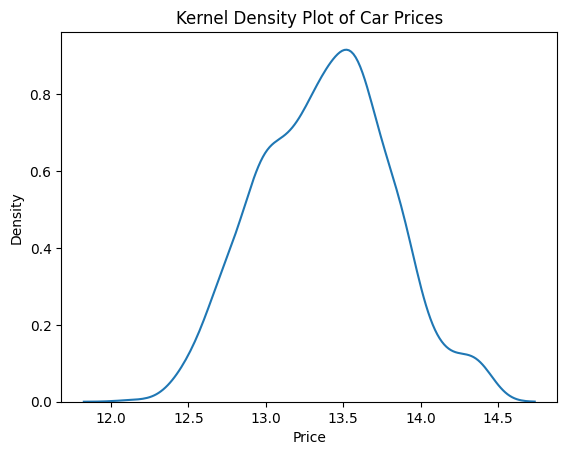

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Part 2 - Summarizing Price Variable
summary = df['Price'].describe()
print(summary)

# Create Kernel Density Plot for Price
sns.kdeplot(data=df, x='Price')
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       15.0  14.375553  0.042433  14.278616  14.348779  14.386491   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

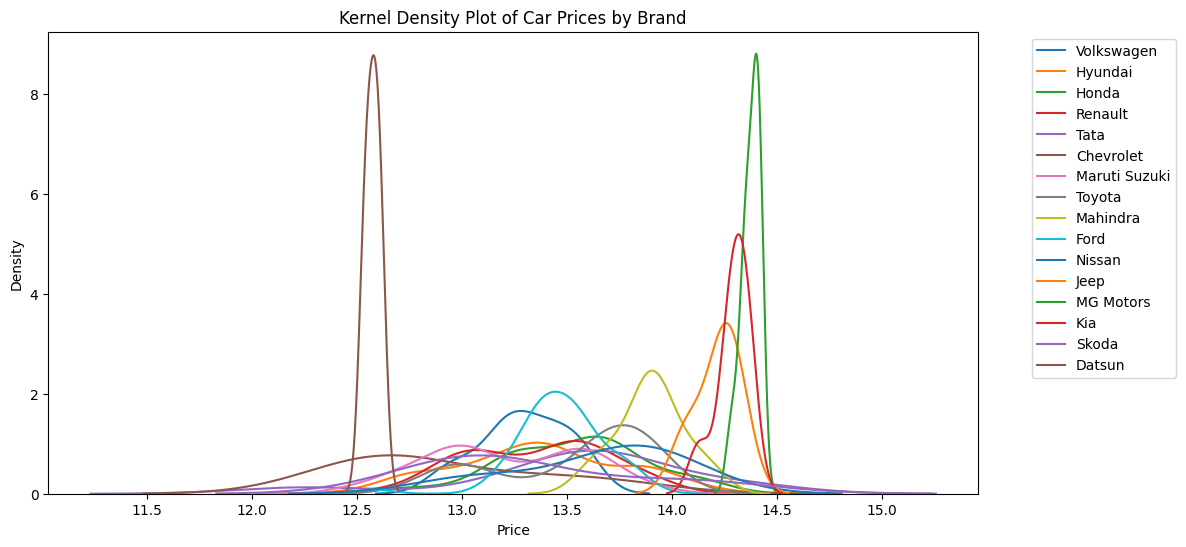

In [211]:
# Part 2 - Summarizing Prices by Brand ('Make')
price_by_brand_summary = df.groupby('Make')['Price'].describe()
print(price_by_brand_summary)

# Create a grouped kernel density plot
plt.figure(figsize=(12, 6))
for brand in df['Make'].unique():
    subset = df[df['Make'] == brand]
    sns.kdeplot(subset['Price'], label=brand)
plt.title('Kernel Density Plot of Car Prices by Brand')
plt.xlabel('Price')
plt.ylabel('Density')
# Move the legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the 'Kernel Density Plot of Car Prices by Brand' plot above, it was observed that MG Motors, Hyundai, and Kia, were the brands that were the most expensive. The curves for these brands were positioned further to the right, signifiying higher prices. Additionally, these brands had a tall, narrow peak that suggested that most of the cars from these brands are sold around the price point between 14.0 and 14.5 on the logarithmic price scale. On the other hand, it was noted that Chevrolet had its peak around 12.5 on the logarithmic price scale, implying that the prices for this car brand are not as high as the other car brands. Generally speaking on the prices of the different car brands, the majority of the density curves seemed to increase between 13.0 and 14.0 on the logarithimic price scale; this suggests that this is the common price range for most car brands. Some car brands have a wide spread in their price distribution, indiciating a variety of price points, while other brands don't have a wide spread of prices, suggesting less variance in their pricing. It was also observed that most curves seem to have a right-skewed distribution. This means there is a fair number of car brands that are priced higher than the peak of each curve.

In [212]:
# Part 3 - Split the data into an 80% training set and a 20% testing set.
from sklearn.model_selection import train_test_split

# Features of data
# I made the assumption (that I believe is correct based on our other linear models we had to create)
# To split have Price vs. all the other variables
X = df.drop('Price', axis=1)
# Target
y = df['Price']  # target

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [213]:
# Part 4 - Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# First Model - regress price on numeric variables alone
# New variable of numeric variables I found
numeric_cols = ['Mileage_Run', 'Seating_Capacity', 'Make_Year']

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

# Create and Fit the Model
model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)

# Predict on Test Set
y_pred_num = model_numeric.predict(X_test_num)

# Calculate and Print
r2_numeric = r2_score(y_test, y_pred_num)
rmse_numeric = mean_squared_error(y_test, y_pred_num, squared=False)
print("The first r2 is: ", r2_numeric)
print("The first RMSE is: ", rmse_numeric)


The first r2 is:  0.4279043703832305
The first RMSE is:  0.30537652402911625


In [214]:
# Second Model - make a model comprised of one-hot encoded regressors/features alone,
# and regress price on those variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'No_of_Owners']

# Create the Encoder object
# Was getting error of a shape mismatch where shape of passed in values was (951,1),
# but the indices implied (951,46). To fix this error, I used the sparse_output argument (as found in the article) to get a dense array
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
encoder = OneHotEncoder(sparse_output=False)

encoded_cat_data = encoder.fit_transform(df[categorical_cols])

# Get the Names to create column headers for the encoded data
encoded_names = encoder.get_feature_names_out(categorical_cols)

# Create a new data frame with the encoded variables
# This was how it was done in class
zdf = pd.DataFrame(encoded_cat_data, columns = encoded_names)
zdf.head()

# This drops the old columns to be ready to replace with the encoded variables
df = df.drop(columns=categorical_cols)

# And then concatenate the original DataFrame with the new one containing the one-hot encoded variables
df = pd.concat([df, zdf], axis=1)

df.head()

# ---------------------- the above part did the one hot encoding ----------------------
# ---------------------- below part does the actual model -----------------------------

# One-hot encode the categorical variables in the training set
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

# Create and Fit the Model
model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)

# Predict on the Test Set
y_pred_cat = model_cat.predict(X_test_cat)

# Calculate and Print
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
print("The second r2 is: ", r2_cat)
print("The second RMSE is: ", rmse_cat)

The second r2 is:  0.6375362368269075
The second RMSE is:  0.2430712698832562


When comparing the first model with the second model, the second model had a higher R^2 value and a lower RMSE value. A higher R^2 value means that the second model better explained the data, and a lower RMSE value means the second model's predictions were also better. Thus, the second model performed better than the first model.

In [215]:
# Third Model - Numeric and Categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Combine numeric features with encoded categorical features
# Used pd.concat like we did in class
X_train_combined = pd.concat([X_train[numeric_cols].reset_index(drop=True),
                              pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())], axis=1)
X_test_combined = pd.concat([X_test[numeric_cols].reset_index(drop=True),
                             pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())], axis=1)

# Create and Fit model
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Predict on the Test Set
# Calculate and Print
y_pred_combined = model_combined.predict(X_test_combined)
r2_combined = r2_score(y_test, y_pred_combined)
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)
print("The third r2 is: ", r2_combined)
print("The third RMSE is: ", rmse_combined)


The third r2 is:  0.809322657132951
The third RMSE is:  0.1762994177557514


The third model, also known as the joint model, performs the best. The R^2 value of the third model is higher than the other two models, it was 0.809322657132951, and the RMSE value is lower than the other two models, it was 0.1762994177557514. As mentioned before, a higher R^2 value means that the second model better explained the data, and a lower RMSE value means the second model's predictions were also better. Thus, the joint model performed better than the first and second model.  

In [216]:
# Part 5 - Polynomial Expansion
from sklearn.preprocessing import PolynomialFeatures

# Set degree of expansion of 5
max_degree = 5

# Iterate over degrees to find the best model
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)

    # Instructions say to use the polynomial features function to expand the set
    # of numerical variables
    # Expand numerical features with polynomial features
    X_train_poly = poly.fit_transform(X_train[numeric_cols])
    X_test_poly = poly.transform(X_test[numeric_cols])

    # Combine the polynomial features with the one-hot encoded categorical features
    # Was getting errors, so I searched up different ways and looked into using np.hstack as a different way to concat
    # https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
    X_train_combined = np.hstack((X_train_poly, X_train_encoded))
    X_test_combined = np.hstack((X_test_poly, X_test_encoded))

    # Create and Fit the Model
    model = LinearRegression()
    model.fit(X_train_combined, y_train)
    # Predict
    y_train_pred = model.predict(X_train_combined)
    y_test_pred = model.predict(X_test_combined)

    # Calculate values for both training and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # For better formatting when printing out the R^2 and RMSE values,
    # I made the choice to round the values to 4 decimal points
    r2_train_str = str(round(r2_train, 5))
    rmse_train_str = str(round(rmse_train, 5))
    r2_test_str = str(round(r2_test, 5))
    rmse_test_str = str(round(rmse_test, 5))
    print("The degree is: ", degree)
    print("Train R^2: ", r2_train_str, "Train RMSE: ", rmse_train_str)
    print("Test R^2: ", r2_test_str, "Test RMSE: ", rmse_test_str, '\n')


The degree is:  1
Train R^2:  0.80663 Train RMSE:  0.18574
Test R^2:  0.80932 Test RMSE:  0.1763 

The degree is:  2
Train R^2:  0.82061 Train RMSE:  0.1789
Test R^2:  0.81253 Test RMSE:  0.17481 

The degree is:  3
Train R^2:  0.82488 Train RMSE:  0.17676
Test R^2:  0.80896 Test RMSE:  0.17647 

The degree is:  4
Train R^2:  0.82655 Train RMSE:  0.17591
Test R^2:  0.805 Test RMSE:  0.17829 

The degree is:  5
Train R^2:  0.7617 Train RMSE:  0.20619
Test R^2:  0.77303 Test RMSE:  0.19235 




As the polynomial degree increases from 1 to 5, it was observed that increasing model complexity enhances performance. Transitioning from a linear model (degree 1) to a quadratic model (degree 2), there was improvement in both R² and RMSE on the test set, indicating a better fit. This is seen by the highest R^2 value of 0.82061, and lowest RMSE value of 0.1789. However, as we further increase the polynomial degree to 3 and beyond, the model begins to overfit the training data. This is illustrated by the R² on the training set that increases slightly before decreasing, and the R^2 on the testing set which starts to decrease. The RMSE values also increase. It is seen that the model (at polynomial degree beyond 2) starts to generalize less effectively, signifying that the model is becoming too tailored to the training data. Notably, the R² never goes negative in any of the models. The best model with expanded features is the second-degree polynomial expansion, and the corresponding R^2 and RMSE values are as follows: "Best Test R^2:  0.81253 Test RMSE:  0.17481." The best model from part 3 was the joint model (of numeric and categorical columns). The R^2 value and RMSE value from the joint model from part 3 are as follows: "The third r2 is:  0.809322657132951
The third RMSE is:  0.1762994177557514." When comparing the joint model from part 3 with the model with polynomial degree of 2, it was observed that the polynomial degree of 2 was the better model. This model had a higher R^2 value and a lower RMSE value, implying a better performance in terms of fit and predictive accuracy. A R^2 value closer to 1 suggests that a significant portion of the variance in the predicted variable is explained by the model. A lower RMSE value means that model's predictions are close to the observed data points, implying that there is a closer fit to the data.





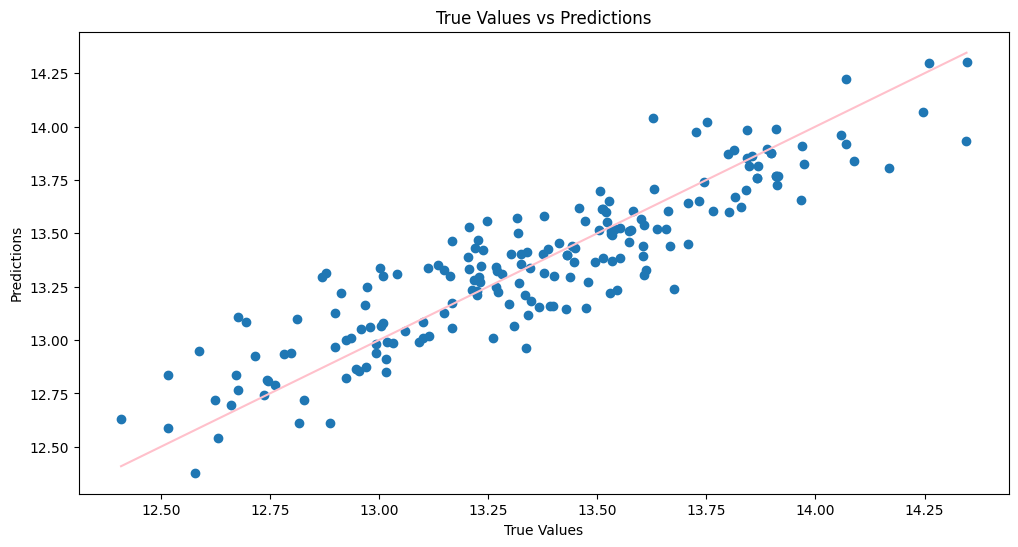

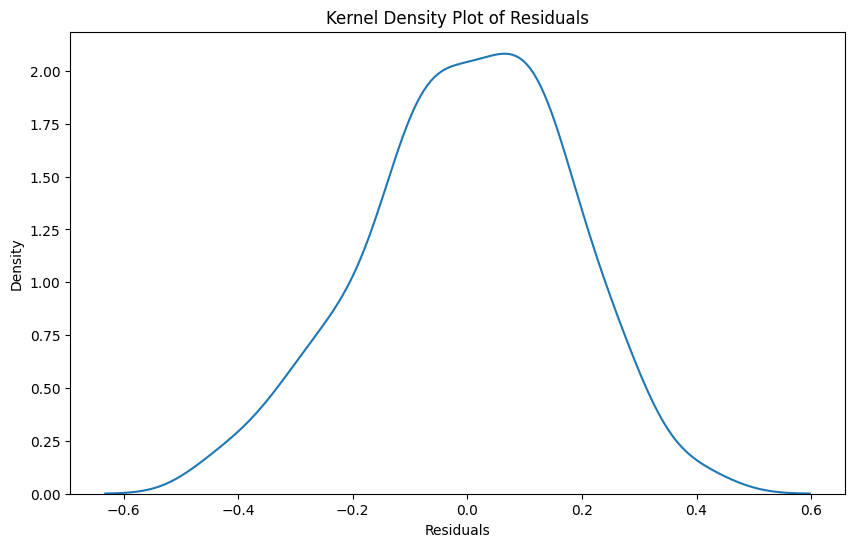

In [217]:
# Part 6 - Find resdiuals and graph KDePlots of Best Model so far
import matplotlib.pyplot as plt
import seaborn as sns

# My best model from was the polynomial at degree 2
# Doing same step as before
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[numeric_cols])
X_test_poly = poly.transform(X_test[numeric_cols])

X_train_combined = np.hstack((X_train_poly, X_train_encoded))
X_test_combined = np.hstack((X_test_poly, X_test_encoded))

model = LinearRegression()
model.fit(X_train_combined, y_train)
y_test_pred = model.predict(X_test_combined)


# Plot true values vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_combined)
# I made the diagonal line pink to clearly distinguish
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='pink')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Kernel density plot of the residuals
# Find Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The predicted and true values do roughly line up along the diagonal. The closer the data points are to the diagonal, the more accurate the model is. If points appear further away from the diagonal, it would imply errors in the predictions. One of the strengths of this model is that it appears to have good predictive performance and high accuracy since most points are clustered and roughly line up with the diagonal, meaning that the predicted values are close to the actual values. However, one weakness is that there are some deviations of predicted values from the actual values, particularly for the higher values. As the values increase, the predicted values appear further away from the diagonal and true values. This might indicate that the model is less accurate for higher values of the target variable.
Additionally, the resdiuals are roughly bell-shaped around zero. One strength of this model is that it indicates the model's errors are normally distributed; the residuals being centered around zero also suggests that the model is unbiased as it doesn't overpredict or underpredict.


In [218]:
# Part 7 - Decision Tree with Best Depth
from sklearn.tree import DecisionTreeRegressor

# Create lists when storing performance metrics
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

# I chose sample range of depths from 1 to 15
depths = range(1,16)

for depth in depths:
    # I chose a random state of 100 - this was a common random state in class

    # Create and fit the regressor
    tree_regressor = DecisionTreeRegressor(max_depth=depth, random_state=100)
    tree_regressor.fit(X_train_combined, y_train)
    # Predict
    y_train_pred = tree_regressor.predict(X_train_combined)
    y_test_pred = tree_regressor.predict(X_test_combined)

    # Calculate performance metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Identify the best depth based on test set performance
# Remember = higher R^2 and lower RMSE value
index = np.argmax(test_r2_scores)
low_rmse_index = np.argmin(test_rmse_scores)
# This if statement just checked to make sure the highest R^2 and lowest RMSE index was used
# Since python starts index from 0, added a 1
# if index == low_rmse_index:
#   print("The index is: ", index+1)
# The best depth index is 7

best_depth = depths[index]
best_test_r2 = test_r2_scores[index]
best_test_rmse = test_rmse_scores[index]

# Print out the best depth and corresponding R² and RMSE
print("Best depth: ", best_depth)
print("Best Test R²: ", best_test_r2)
print("Best Test RMSE: ",best_test_rmse)

Best depth:  8
Best Test R²:  0.7918737823628961
Best Test RMSE:  0.1841894403032278


The best depth tree was of depth 7. At this depth level, the highest R^2 and lowest RMSE was found.

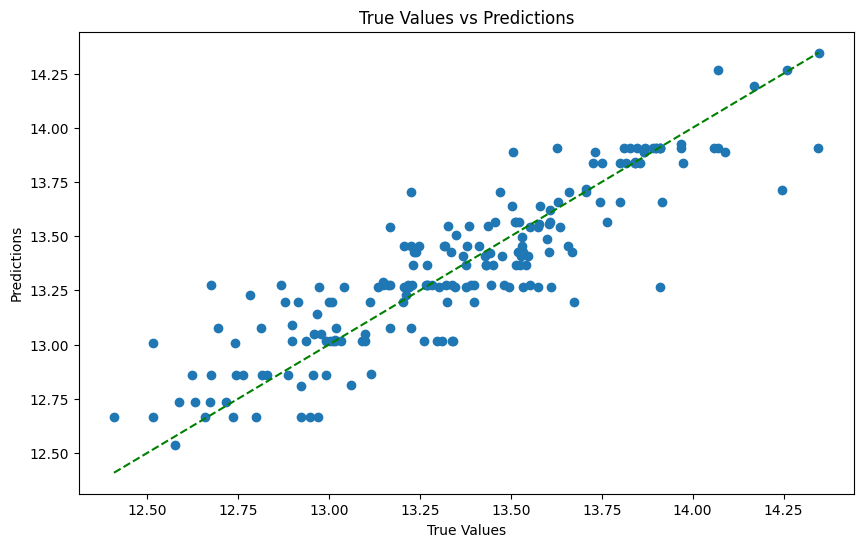

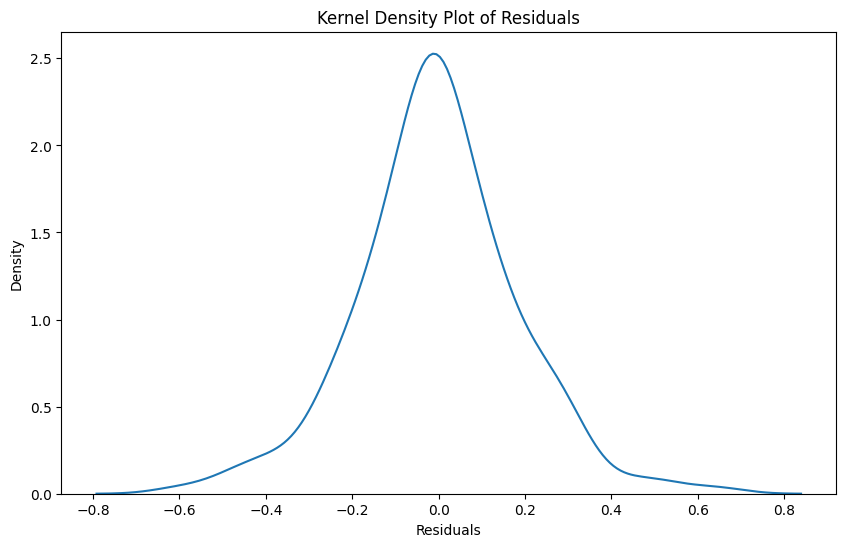

In [219]:
# Part 8 - Find Residuals and KDePlot for Best Depth Tree

# My best model from part 7 was the depth tree at level 7
# Create a decision tree regressor and fit the model
best_tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=100)
best_tree_regressor.fit(X_train_combined, y_train)

# Predict on the test set
y_test_pred = best_tree_regressor.predict(X_test_combined)

# Find Residuals
residuals = y_test - y_test_pred

# Plot true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
# I made the diagonal line green to clearly distinguish
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Kernel density plot of the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The predicted values and true values do roughly line up along the diagonal. This model seems to have a good prediction accuracy as the majority of the data is clustered around the diagonal line. However, there was presence of outliers and extreme values in the scatter plot. While most of the points were close to the diagonal, some points were further away, indicating larger errors for certain predicted values.
Additonally, the kernel density plot also indicates that the residuals are centered and have a bell-shaped distribution around zero. Since the residuals are roughly centered around zero, this model is an unbiased model, so it does not overpredict or underpredict the target variable.

Part 9 - Best Model

The R^2 and RMSE value from the best model (of polynomial degree of 2)  is as follows: R^2 is  0.81253, and the RMSE is 0.17481. The R^2 and RMSE value from the best regression tree (at depth 7) is as follows: R^2 is 0.790978 and the RMSE is 0.184586. When comparing these two models, the model of polynomial degree 2 has the higher R^2 value and lower RMSE value. This indicates that this model is the better model. Having a high R^2 value means that the model indicates a good level of fit between the model's predicted values and the actual values, meaning that the model explains a significant portion of the variance in the outcome variable. Having a low R^2 value indicates the differences between the predicted values and the actual values are small, implying that the model's predictions are generally very close to the actual values.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

Part 4


*   $b^*$ is the Ordinary Least Squares (OLS) estimate of the slope b in the model $\hat{y}_i = a + b z_i$, and represents the change in the predicted value of y when x changes by one unit. Thus, $b^*$ represents the linear relationship between the variables x and y.  When $b^*$ is large, there is a strong linear relationship between x and y, and x has low variance (so less noise). When $b^*$ is small, there is a weak linear relationship between x and y, and x has high variance (so more noise). $a^*$ is the Ordinary Least Squares (OLS) estimate of the intercept a in the model $\hat{y}_i = a + b z_i$, and represents the predicted value of y when x is 0.

Part 5


*   When there is measurement error in x, the variance will be inflated. The precense of this measurement error, and thus increased variance, will weaken the linear relationship between the variables x and y. Thus,  $b^*$ will be smaller and becomes attenuated and underestimated since this measurement error introduces noise into the linear relationship.This affects our ability to predict as predictions using this attenuated $b^*$ will be less accurate. Thus, the predicted model will not capture the true strength of the linear relationship between the variables x and y, and the model may have larger errors.  

Part 6


*   The Ordinary Least Square (OLS coefficients), $a^*$ and $b^*$, are sensitive to outliers, so their values can be greatly influenced with the presence of outliers. Outliers in the outcome variable,$y_i$, can effect $a^*$. These outliers might result in the intercept of the regression line to be shifted to try to accommodate, or "fit", these outliers. As a result, $a^*$ may be pulled towards or away from the majority of the data points. Outliers in the outcome variable, $y_i$, and the predictor variable, $x_i$, can have an effect on $b^*$. These outliers in x or y will deviate largely from the rest of the data points, and the regression line might try to fit the outliers. Thus, this leads to changes in the slope of the regression line, resulting in $b^*$ being steeper or flatter with the presence of the outlier. As a result of extreme values/outliers having an influence on $a^*$ and $b^*$, the model may not perform well on more average observations. This is because for more average observations, the model's predictions will become less accurate because of the presence of outliers, and the model may not capture the true relationship bewteen x and y.  




